<a id='quantum_Ising_file'></a>
Using Variational Quantum Eigensolver to find the ground state of the 1D quantum Ising model.

_________________________________________________________

By Damian Pope, PhD

Introduction to Quantum Machine Learning lecture

In [1]:
!pip install pennylane

Defaulting to user installation because normal site-packages is not writeable


params=[0.07630829 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.07205113 0.26843898 0.4998825  0.67923    0.80373904
 0.38094113 0.06593635]
Step = 0,  Energy = -5.2587
Step = 5,  Energy = -21.6975
Step = 10,  Energy = -24.6496
Step = 15,  Energy = -25.0249
Step = 20,  Energy = -27.6629
Step = 25,  Energy = -26.2091
Step = 30,  Energy = -27.5217
Step = 35,  Energy = -29.6084
Step = 40,  Energy = -28.7303
Step = 45,  Energy = -26.7312
Step = 50,  Energy = -28.4568
Step = 55,  Energy = -28.7459
Step = 60,  Energy = -27.1093
Step = 65,  Energy = -29.2056
Step = 70,  Energy = -28.6299
Step = 75,  Energy = -28.5350
Step = 80,  Energy = -29.1978
Step = 85,  Energy = -28.5764
Step = 90,  Energy = -28.4137
Step = 95,  Energy = -28.8517
Step = 100,  Energy = -28.7360
Step = 105,  Energy = -28.7771
Step = 110,  Energy = -28.7572
Step = 115,  Energy = -28.9015
Step = 120,  Energy = -28.6705
Step = 125,  Energy = -28.9252
Step = 130,  Energy = -28.7607
Step = 135,  Energy =

(array([-40., -30., -20., -10.,   0.,  10.,  20.]),
 [Text(0, -40.0, '−40'),
  Text(0, -30.0, '−30'),
  Text(0, -20.0, '−20'),
  Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20')])

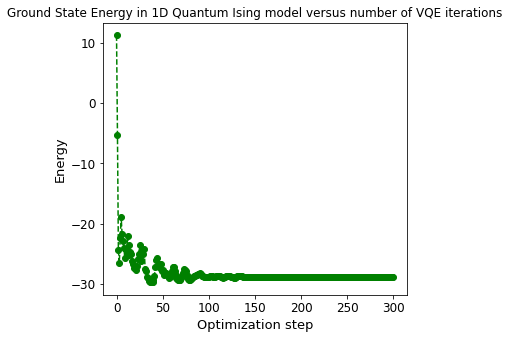

In [2]:
import pennylane as qml
from pennylane import numpy as np

N = 3

dev = qml.device("default.qubit",wires=range(N))

J = 1
h_x = -10
h_z = 0

wires = range(N)

def createHamiltonian(N,J,h_x,h_z):

  coeffs = []
  terms_list = []

  for i in range(N-1):
    coeffs.append(-J)
    terms_list.append(qml.PauliZ(i) @ qml.PauliZ(i+1))

  for i in range(N):
    coeffs.append(-h_x)
    terms_list.append(qml.PauliX(i))

    coeffs.append(-h_z)
    terms_list.append(qml.PauliZ(i))



  H_Ising = qml.Hamiltonian(coeffs,terms_list)
  return H_Ising


H = createHamiltonian(N,J,h_x,h_z)


np.random.seed(7)
params = np.random.rand(2**(N+1) - 2,requires_grad = True)

print(f"params={params}")

@qml.qnode(dev)
def circuit(params, wires):

    #https://docs.pennylane.ai/en/stable/code/api/pennylane.ArbitraryStatePreparation.html
    qml.ArbitraryStatePreparation(params, wires=wires)




    return qml.expval(H)


##############################################################################
# We can now define our error function simply as the expected value calculated above:


def cost_fn(params):
    return circuit(params, wires=wires)



max_iterations = 300
conv_tol = 1e-04


opt = qml.GradientDescentOptimizer(stepsize=0.1)




# store the initial value of the energy
energy = [cost_fn(params)]



for n in range(max_iterations):
    params,previous_energy = opt.step_and_cost(cost_fn,params)
    energy.append(cost_fn(params))

    conv = np.abs(energy[-1] - energy[-2])

    if n % 5 == 0:
        print(f"Step = {n},  Energy = {energy[-1]:.4f}")

    if conv <= conv_tol:
        break

print("\n" f"Final value of the ground-state energy = {energy[-1]:.4f}")
print("\n" f"Optimal values of the circuit parameters = {params}")

import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Add energy plot on column 1
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 2), energy, "go", ls="dashed")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("Energy", fontsize=13)
ax1.set_title("Ground State Energy in 1D Quantum Ising model versus number of VQE iterations")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Condensed matter physicists are often interested in something called the magnetization observable: $$M = \left| \frac{1}{N} \Sigma_i Z_i \right| $$

It characterizes the net magnetic moment of the spins.

Calculate the magnetization of the ground state by running the code in the next cell.

In [3]:
'''
@qml.qnode(dev)
def circuit2(params):
  qml.ArbitraryStatePreparation(params, wires=wires)

  return [qml.expval(qml.PauliZ(wires=i)) for i in wires]

Z_av_list = circuit2(params)

sum = 0

for i in range(N):
  sum += float(Z_av_list[i])


print("Magnetization = ", np.abs(sum/N))
'''

'\n@qml.qnode(dev)\ndef circuit2(params):\n  qml.ArbitraryStatePreparation(params, wires=wires)\n\n  return [qml.expval(qml.PauliZ(wires=i)) for i in wires]\n\nZ_av_list = circuit2(params)\n\nsum = 0\n\nfor i in range(N):\n  sum += float(Z_av_list[i])\n\n\nprint("Magnetization = ", np.abs(sum/N))\n'